In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib

In [2]:
def pic1():
    # initialize our canvas as a 300x300 pixel image with 3 channels
    # (Red, Green, and Blue) with a black background
    canvas1 = np.zeros((300, 300, 1), dtype="uint8")
    cv2.rectangle(canvas1, (100, 100), (200,200),1,-1)
    cv2.rectangle(canvas1, (30, 225), (250, 200),1, -1)

    plt.subplot(221), plt.imshow(canvas1, cmap='gray')
    plt.title('Multiple Region'), plt.xticks([]), plt.yticks([])
    return canvas1


(300, 300, 1)

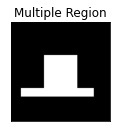

In [3]:
arr1 = pic1()
width = arr1.shape[0]
length = arr1.shape[1]
arr1.shape

In [4]:
def pic2():
    # initialize our canvas as a 300x300 pixel image with 3 channels
    # (Red, Green, and Blue) with a black background
    canvas3 = np.zeros((300, 300, 1), dtype="uint8")
    # blue=(0,0,255)
    cv2.rectangle(canvas3, (100, 100), (200, 200), 1, -1)

    plt.subplot(221), plt.imshow(canvas3, cmap='gray')
    plt.title('Single Region'), plt.xticks([]), plt.yticks([])
    return canvas3

(300, 300, 1)

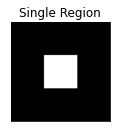

In [5]:
arr2 = pic2()
width = arr2.shape[0]
length = arr2.shape[1]
arr2.shape

In [8]:
def find_first_pixel(arr):
    stop_flag=0
   # canvas3 = pic()
    length = arr.shape[0]
    width = arr.shape[1]
    for i in range(length):
        if (stop_flag==0):
            for j in range(width):
                if (arr[i][j] == 1):
                    x = i
                    y = j
                    stop_flag=1
                    break
    return (x, y)


f = find_first_pixel(arr1)
print(f)

(100, 100)


In [ ]:
# works but doesn't handle outside pic pixels
def border_tracing_4(arr):
    p0 = find_first_pixel(arr)
    row = p0[0] #current row
    col = p0[1] #current_column
    borders = [p0] #list to add p (border pixels)
    dirc = 3
    search = (dirc+3) % 4 #the next direction we're gonna check

    while(1):
        search_col = col #column of the next direction
        search_row = row            #row of the next direction
            
        if (search == 0):
            search_col = col+1 
            if (search_row > col ):
                search=search-1 
                
        if (search == 1):
            search_row = row-1          
            if (search_row < 0):
                search=search+1            
        
        if (search == 2):
            search_col = col-1
            if (search_col < 0):
                search=search+1
               
        if (search == 3):
            search_row = row+1  
            if (search_row > row ):
                search=search-1 
                
        if (arr[search_row][search_col] == 1): #when we find a pixel with intensity=1
            row = search_row
            col = search_col
            borders.append((row,col))
            if (borders[-1] == borders[1] and borders[-2] == borders[0] and len(borders)>2): #stopping criteria
                break 
                
            if(borders[-1][1] > borders[-2][1]): # to right
                dirc = 0                  
            elif(borders[-1][0] < borders[-2][0]): #upwards
                dirc = 1
            elif(borders[-1][1] < borders[-2][1]): #to left
                dirc = 2                      
            elif(borders[-1][0] > borders[-2][0]): #downwards 
                dirc = 3        
            search = (dirc+3) % 4
            
        else:
            search = search+1
            if(search>3):
                search=0

    return borders #coz last two vals are repeated
    
b1=border_tracing_4(arr1)
# b    

In [ ]:
b2=border_tracing_4(arr2)

In [ ]:
#plot borders to make sure we got it right
from PIL import Image
from IPython.display import display
data_in_array = np.array(b1)
transposed = data_in_array.T 
x, y = transposed 
plt.axis([0, 300, 0, 300])
plt.plot(x, y, 'ro')
image=Image.open("./img3.jpg")
transposed  = image.transpose(Image.ROTATE_270)
plt.savefig('img3.jpg')
transposed.show()


In [ ]:
from PIL import Image
from IPython.display import display
data_in_array = np.array(b2)
transposed = data_in_array.T 
x, y = transposed 
plt.axis([0, 300, 0, 300])
plt.plot(x, y, 'ro')
image=Image.open("./img3.jpg")
transposed  = image.transpose(Image.ROTATE_270)
plt.savefig('img3.jpg')
transposed.show()